## COMP 3400: Data Preparation Techniques Project
## Name of our Project

**Group Members:**
  - Liudmila Strelnikova 201819885
  - David Chicas 201919354

**Description of our data:**
This data set was uploaded by user *Daniel Grijalva* and was found in *Kaggle*, the dataset can be found [here](https://www.kaggle.com/datasets/danielgrijalvas/movies). This dataset compiles different aspect of the film industry from 1980 to 2020. In this data we can observe different patterns like the most commons release dates for films, the highest grossing genres of movies, as well as consumers best rated movies. We will use this information for **nlahnlahnlah**. 

**Description of our variables:**
- **Name:** Title of the film. This helps us differentiate between each film. 
- **Rating:** Given to each movie by the Classification and Ratings Administration (CARA), the rating provides information needed to determine of a film is suitable for children. We can use this information to see the difference between movies rated for everyone and for a specific group of consumers. 
- **Genre:** Is a thematic category given to a film depending on theme, plot, topics and other conventions. This information can help us determine what types of genres are the more popular, highest grossing, and more common. 
- **Year:** Release year of the film. Ranges from 1980 to 2020. We can use this to sed the difference between consuming movies in the past and present. 
- **Released:** Exact date when the film was released and place of release. This data can be presented in a more useful way by separating the information into two different columns. We can see what is the most commons and uncommon release date for a movie and see how it affects different aspects of the film. 
- **Score:** Rating given to a film by users of [iMDb.com](https://www.imdb.com) on a scale of 1 to 10 depending on enjoyability of the film. This can help us see any correlation between what consumers like and the different variables like genre, release date, and director.
- **Director:** Person who manages the film's creative aspects, like directing the film crew and actors. With the data we have we can see who the highest grossing directors are or the most well rated director. 
- **Writer:** Person who writed the script for the movie. This information is not relevant to our project.
- **Star:** Most known actor in that is in the movie. This information is not relevant to our project.
- **Country:** Place where the movie was released for it's premiere, decided by the producers and film company. We can see how the director or production company can affect the country of release for a film. 
- **Budget:** Amount of money alloted to the film's creation by the producers and film company, presented in US dollars. With this information we can see if a film was profitable or lost money, and we can also see if different directors/film company have any tendencies to having a bigger budget with certain variables. 
- **Gross:** Refers to gross box office earnings of a movie in U.S. dollars, this does not include any other forms of revenue. This can be used to see any impact that user score has, what genres are the most profitable, and many more correlations.
- **Company:** Business in charge of producing the film. We can see what type of film genre is most common with what film company, as well as the success that the companies films have. 
- **Runtime:** Total amount of time from start to finish that the film lasts. Presented in minutes. With this information we can see if the duration of the movie has any effect on budget, rating, or score. 

In [65]:
import numpy as np
import matplotlib.pyplot as plt
import datetime
import pandas as pd

In [66]:
movies = pd.read_csv('./movies.csv')
movies.head(5)

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


## Getting rid of unnecessary columns, splitting "released" column

The columns "writer", "votes", and "star" do not present any significance in the analysis, so they are removed from the dataframe.

In [67]:
to_drop = ['writer', 'votes', 'star']
movies.drop(to_drop, inplace=True, axis=1)
movies.head(5)

,name,rating,genre,year,released,score,director,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,Stanley Kubrick,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,Randal Kleiser,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,Irvin Kershner,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,Jim Abrahams,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,Harold Ramis,United States,6000000.0,39846344.0,Orion Pictures,98.0


The column "released" is split into "date" and "release_country" for more meaningful analysis. 

In [68]:
movies[['date','release_country']] = movies.released.str.split("(",expand=True)


By using the left parenthesis as a split symbol in the previous operation, the right parenthesis in the column release_country should be removed.

In [69]:
movies['release_country'] = movies['release_country'].str.replace(')', '', regex = True)

To finish this cleaning step off, the column "released" and "release_country" is deleted

In [70]:
movies.drop('released', inplace=True, axis=1)
movies.drop('release_country', inplace=True, axis=1)

Now that we deleted the data we do not need we can format some of our variables like: budget, gross and runtime. 
Edit: should probably do this last :)

In [71]:
#movies['budget'] = movies['budget'].apply(lambda x: f"${x*1:,.2f}")
#movies['gross'] = movies['gross'].apply(lambda x: f"${x*1:,.2f}")
#movies['runtime'] = movies['runtime'].apply(lambda x: f"{x*1:,.0f} min")

In [72]:
movies.head(10)

,name,rating,genre,year,score,director,country,budget,gross,company,runtime,date
0,The Shining,R,Drama,1980,8.4,Stanley Kubrick,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0,"June 13, 1980"
1,The Blue Lagoon,R,Adventure,1980,5.8,Randal Kleiser,United States,4500000.0,58853106.0,Columbia Pictures,104.0,"July 2, 1980"
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,8.7,Irvin Kershner,United States,18000000.0,538375067.0,Lucasfilm,124.0,"June 20, 1980"
3,Airplane!,PG,Comedy,1980,7.7,Jim Abrahams,United States,3500000.0,83453539.0,Paramount Pictures,88.0,"July 2, 1980"
4,Caddyshack,R,Comedy,1980,7.3,Harold Ramis,United States,6000000.0,39846344.0,Orion Pictures,98.0,"July 25, 1980"
5,Friday the 13th,R,Horror,1980,6.4,Sean S. Cunningham,United States,550000.0,39754601.0,Paramount Pictures,95.0,"May 9, 1980"
6,The Blues Brothers,R,Action,1980,7.9,John Landis,United States,27000000.0,115229890.0,Universal Pictures,133.0,"June 20, 1980"
7,Raging Bull,R,Biography,1980,8.2,Martin Scorsese,United States,18000000.0,23402427.0,Chartoff-Winkler Productions,129.0,"December 19, 1980"
8,Superman II,PG,Action,1980,6.8,Richard Lester,United States,54000000.0,108185706.0,Dovemead Films,127.0,"June 19, 1981"
9,The Long Riders,R,Biography,1980,7.0,Walter Hill,United States,10000000.0,15795189.0,United Artists,100.0,"May 16, 1980"


## Attribute's Descriptors

**Name:**

In [73]:
# code here

**Rating:** Rating is a classification given by the Motion Picture Association (MPA) to rate the target audience of a film. We can use this data later to see any correlation between film rating and gross earnings, scores, and other variables. There is a big difference between the rating with the most

From the rating data distribution, the overwhelming majority of movies are R-rated, with PG-13 taking the second place and PG on the third. 

- R - to view this movie under 17 years of age, one would need an adult present. 
- PG-13 - some materials can be inappropriate for viewers under 13. Parental guidance recommended but not necessary.
- PG - parental guidance suggested, as the movie might not be appropriate for children of any age. 
- G - audiences of all ages are admitted. 
- NC-17 - no one under 17 years of age is admitted. 
- TV-MA - a movie approved to be aired on TV but virtually has the rating of NC-17.
- TV-PG - a movie approved to be aired on TV but virtually has the rating of PG.
- TV-14 - a movie approved to be aired on TV but virtually has the rating of PG-14.
- X - pornographic content. 

**Things to change/consider based on the distribution:**
- Approved is the same as G, and should be changed during the cleaning stage. 
- The categories Unrated and not Rated can be combined into one. 

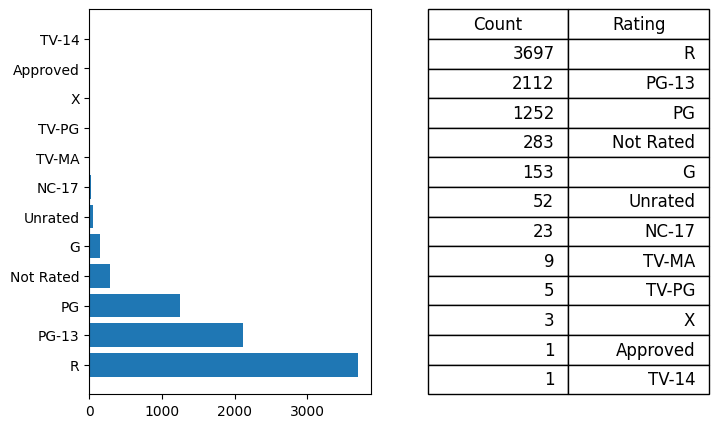

In [74]:
ratingsDF = pd.DataFrame()
ratingsDF['Count'] = movies['rating'].value_counts().sort_values(ascending=False)
ratingsDF['Rating'] = movies['rating'].value_counts().index.tolist()

fig = plt.figure(figsize=(8,5))

ax1 = fig.add_subplot(121)
plot = ax1.barh(ratingsDF['Rating'],ratingsDF['Count'], 0.8)

ax2 = fig.add_subplot(122)
ax2.axis('off')
font_size=12
bbox=[0, 0, 1, 1]
table = ax2.table(cellText = ratingsDF.values, bbox=bbox, colLabels=ratingsDF.columns)
table.auto_set_font_size(False)
table.set_fontsize(font_size)

plt.show()

**Genre:** From the distribution of the genre attribute, we can see that most movies identify as a comedy, with Action and Drama being the second and third most popular labels. 

**Things to change/consider based on the distribution:**
- Most movies nowadays have can fall under several genres, so I am not sure if it's impossible to draw any sort of meaningful conclusion from the genre distribution alone.


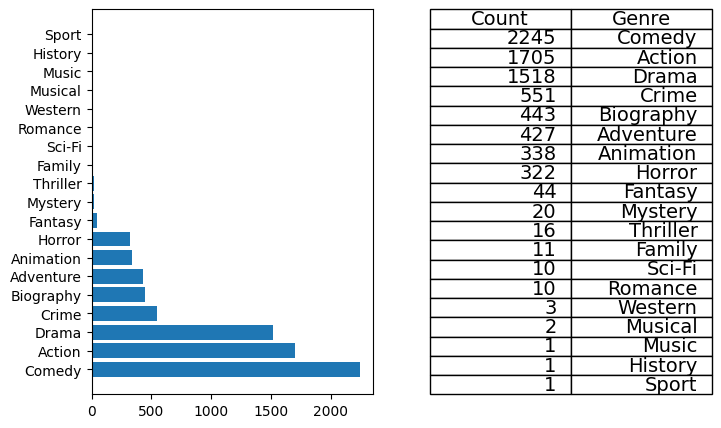

In [75]:
GenreDF = pd.DataFrame()
GenreDF['Count'] = movies['genre'].value_counts()
GenreDF['Genre'] = movies['genre'].value_counts().index.tolist()

fig = plt.figure(figsize=(8,5))

ax1 = fig.add_subplot(121)
plot = ax1.barh(GenreDF['Genre'],GenreDF['Count'], 0.8)

ax2 = fig.add_subplot(122)
font_size=14
bbox=[0, 0, 1, 1]
ax2.axis('off')
mpl_table = ax2.table(cellText = GenreDF.values, bbox=bbox, colLabels=GenreDF.columns)
mpl_table.auto_set_font_size(False)
mpl_table.set_fontsize(font_size)

**Year:** The distribution shows that the dataset contains 200 most popular movies for each year from 1997 to 2020.

**Things to change/consider based on the distribution:**
- We should definetely not consider the movies from 2020 as the author of the dataset stopped aquiring them before the end of the year.  
- Not a lot of popular movies were made in the years between 1980 t0 1984. Nonetheless, the period consists of a lot of "classics", so it might be reasonable to still use this data keeping in mind that there are less movies.

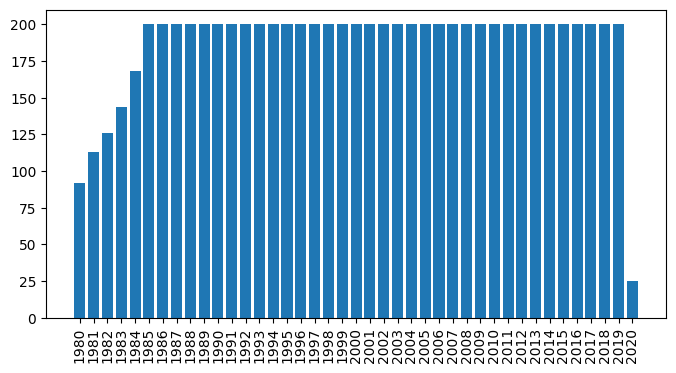

In [76]:
#YearsPlot = movies['year'].value_counts().plot.bar()
YearsDF = pd.DataFrame()
YearsDF['Count'] = movies['year'].value_counts().sort_values(ascending=False)
YearsDF['Year'] = movies['year'].value_counts().index.tolist()

YearsDF.sort_values(by = 'Year') #want to make sure no year is skipped

fig, ax = plt.subplots(figsize=(8,4))
ax.bar(YearsDF['Year'],YearsDF['Count'], 0.8)
ax.set_xticks(YearsDF['Year'], labels=YearsDF['Year'],rotation=90)

plt.show()

**Score:**

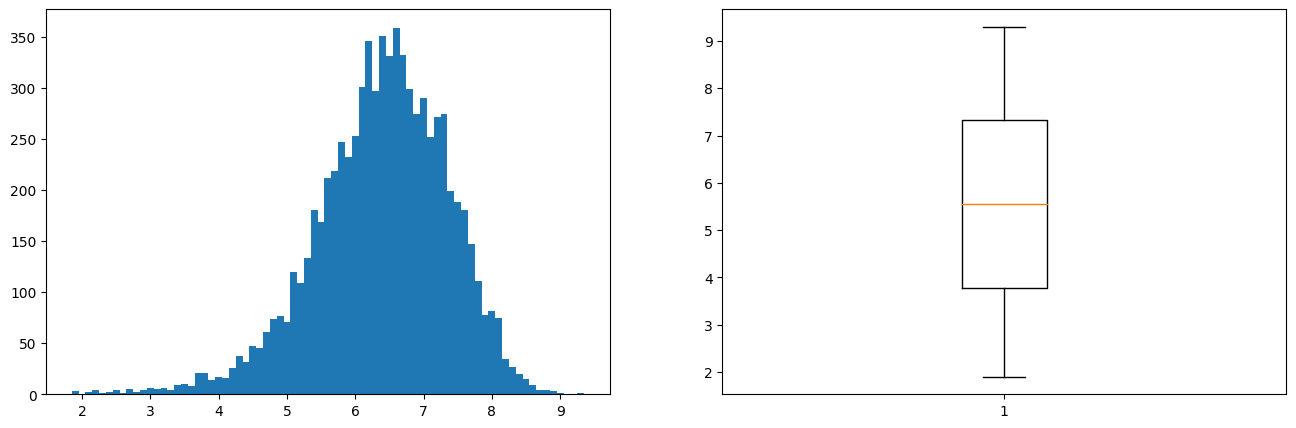

In [77]:
ScoreDF = pd.DataFrame()
ScoreDF['Count'] = movies['score'].value_counts().sort_values(ascending=False)
ScoreDF['Score'] = movies['score'].value_counts().index.tolist()

fig = plt.figure(figsize=(16,5))

ax1 = fig.add_subplot(121)
plot = ax1.bar(ScoreDF['Score'],ScoreDF['Count'],0.1)

ax2=fig.add_subplot(122)
bar = ax2.boxplot(ScoreDF['Score'])

plt.show()

**Director:**

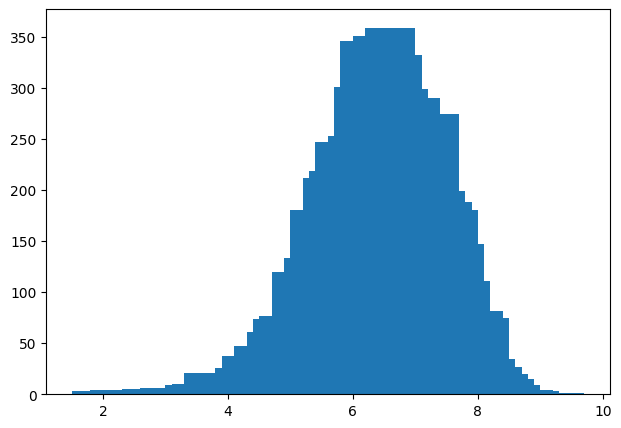

In [78]:
ScoreDF = pd.DataFrame()
ScoreDF['Count'] = movies['score'].value_counts().sort_values(ascending=False)
ScoreDF['Score'] = movies['score'].value_counts().index.tolist()

fig = plt.figure(figsize=(16,5))

ax1 = fig.add_subplot(121)
plot = ax1.bar(ScoreDF['Score'],ScoreDF['Count'], 0.8)

plt.show()

**Country:**

In [79]:
CountryDF = pd.DataFrame()
CountryDF['Count'] = movies['country'].value_counts().sort_values(ascending=False)
CountryDF['Country'] = movies['country'].value_counts().index.tolist()



**Budget:**

**Gross:** When plotting box and violin plots for the distribution of the varialbe 'gross', it can be clearly seen that 50% of all movies are making much less than half a billion dollars. There are no movies in the dataset that made "negative amount of money" meaning we don't have to clean those outliers. It seems like there are a lot of "outliers" beyond the right interquartile range but that is mostly due to how massive the dataset is, and not the fault of the data. 

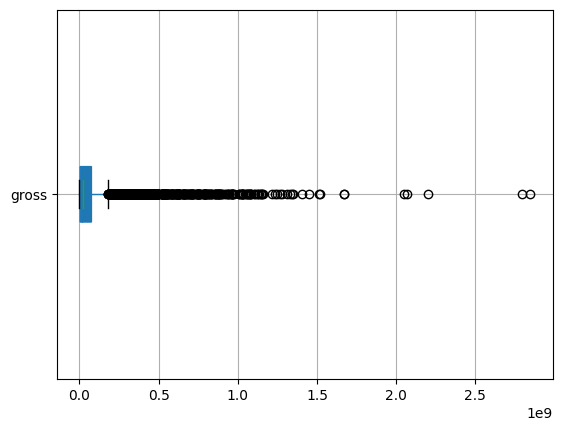

In [84]:
gross = pd.DataFrame(data = movies['gross'])
gross.boxplot(patch_artist = True, notch ='True', vert = 0)
plt.show()

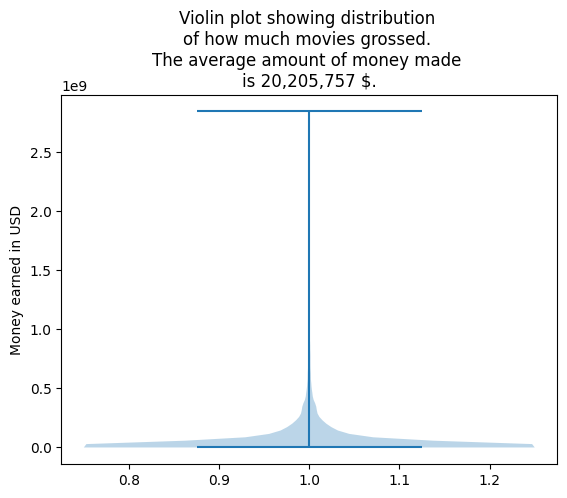

In [85]:
fig, ax = plt.subplots()
ax.violinplot(gross.dropna())
ax.set_title("Violin plot showing distribution \nof how much movies grossed. \nThe average amount of money made \nis 20,205,757 $.")
ax.set(ylabel='Money earned in USD')
plt.show()

**Company:**

**Runtime:** From the runtime distribution, we can see that 50% of movies run around 100 minutes, with an average screening time being approximately 107 minutes. The minimum duration of a movie is 55 minutes, and the maximum is 366 minutes, both of which are acceptable movie durations indicating that there are not any obvious outliers in the distribution.

**Things to remove/consider:**
Not much to consider here as all the outliers have been checked and are legitimate movies. 

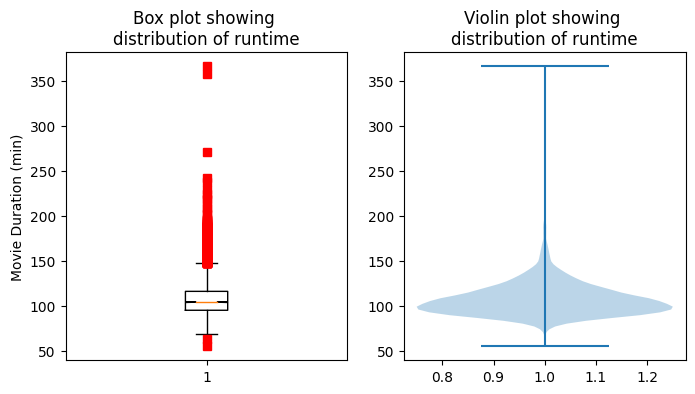

,runtime
count,7664.000000
mean,107.261613
std,18.581247
min,55.000000
25%,95.000000
50%,104.000000
75%,116.000000
max,366.000000


In [104]:
runtime = pd.DataFrame(data = movies['runtime'].dropna())

fig, ax = plt.subplots(1,2,figsize=(8,4))

ax[0].boxplot(runtime.dropna(),1,'rs')
ax[0].set_title("Box plot showing \ndistribution of runtime")
ax[0].set(ylabel="Movie Duration (min)")

ax[1].violinplot(runtime)
ax[1].set_title("Violin plot showing \ndistribution of runtime")

plt.show()

runtime.describe()

**Date:**

In [ ]:
dates = movies['date'].value_counts()
dates.plot()

**Release Country:**

## Mila trying to get a feel for the data distributions (consider semi-serious)

In [ ]:
movies.info()

Data in columns such as 'budget', 'gross' should be converted to float64; 'runtime' should be converted to int64, an 'name','rating', 'genre', 'country', 'company', 'release_country' should be strings. 
'year' can be converted to string because we are not likely to use it in any kind of statistical analysis. 

In [ ]:
movies['score'] = movies['score'].astype(np.float64)
movies['budget'] = movies['budget'].astype(np.float64)
#movies['year'] = movies['year'].astype('|S4')

In [ ]:
movies.describe()

In [ ]:

movies.agg({'budget': ['mean', 'std', 'median'], 'gross': ['mean', 'std']})


In [ ]:
agg_dict = {'budget': ['mean'], 'gross': ['mean']}
shmoney = movies.groupby(['year']).agg(agg_dict)
shmoney

In [ ]:
shmoney.plot()
#axs.plot()

Well, the result of this evenings practice is that we have a noice graph about shmoney which tells us that movies' gross earnings have been steadily increasing over the years. Movies have also been becoming more expensive to make, however the increase in this parameter is not as drastic. 

### Mila tries scatter plots

In [ ]:
plt.scatter(movies[['budget']], movies[['year']])

Typycally, as Budget of the movies goes up, so does the Gross company earnings. 

In [ ]:
plt.scatter(movies[['budget']], movies[['gross']])
plt.xlabel("Budget")
plt.ylabel("Gross")

In [ ]:
movies.sort_values(by='gross',ascending=False).head(10)
#Top ten most commercially successful movies 

In [ ]:
movies.sort_values(by='budget', ascending=False).head(10)
#Top ten most expensive movies
#Also all of the most expensive and commercially successful movies are in Action genre.
#Marvel and Walt Disney (which are the same thing now, talk about monopoly) are clearly dominating the market. 

In [ ]:
movies['net_gross'] = movies['gross'] - movies['budget']
movies.sort_values(by='net_gross', ascending=False).head(10)
#I thought I would see a different disctribution if I sorted by net gross but no, still Disney making bank

In [ ]:
#To illustrate how Action/Animation movies and specifically Disney movies dominate the film industry, here are some histograms:
shmoneys_genre = movies.groupby('genre').agg({'net_gross':['mean']})
shmoneys_genre.plot.barh(legend=False)


In [ ]:
#Okay, weird graph why the heck is this Family bar so huge??

In [ ]:
shmoneys_genre = movies.groupby('genre').agg({'net_gross':['sum']})
shmoneys_genre.plot.barh(legend=False)


In [ ]:
#Okay well by sum we can see that Action movies are the most successful, probably solely because of Marvel

In [ ]:
#I wonder what is the most common genre by number of movies?

In [ ]:
disney = movies[(movies["company"] == "Walt Disney Pictures") | (movies["company"] == "Marvel Studios")]

In [ ]:
shmoneys_company = movies.groupby("company").agg({'net_gross':['sum']})
shmoneys_company_sorted = shmoneys_company.sort_values(by=[("net_gross", "sum")], ascending=False)

In [ ]:
shmoneys_company_top10_sum = shmoneys_company_sorted.iloc[:10]
shmoneys_company_top10_sum.plot.barh(legend=False)

In [ ]:
shmoneys_company2 = movies.groupby("company").agg({'net_gross':['mean']})
shmoneys_company_mean_sorted = shmoneys_company2.sort_values(by=[("net_gross", "mean")], ascending=False).head(20)

shmoneys_company_top10_mean = shmoneys_company_mean_sorted.iloc[:10]
shmoneys_company_top10_mean.plot.barh(legend=False)

In [ ]:
#Okay well it makes sense that by sum Universal Pictures is the shmoniest company as it is pretty old and has a BUNCH of movies
#(no matter how mediocre). 
#By mean however, I am finally proving my suspicions that Marvel folks are eating gold